In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### EDA

In [4]:
data=pd.read_csv('data/laptop_data_cleaned.csv')
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [6]:
data.shape

(1273, 13)

In [8]:
data.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [14]:
data.drop_duplicates(inplace=True)

In [18]:
data.duplicated().sum()

0

In [20]:
data.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD              int64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

In [22]:
data = pd.get_dummies(data,  drop_first=True)
data=data.astype(int)
data.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,8,1,11,0,1,226,0,128,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1,10,0,0,127,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1,10,0,0,141,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1,11,0,1,220,0,512,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1,11,0,1,226,0,256,1,0,...,1,0,0,1,0,0,1,0,0,0


### Outlier handling

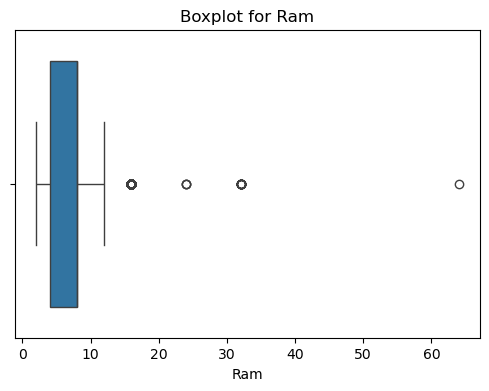

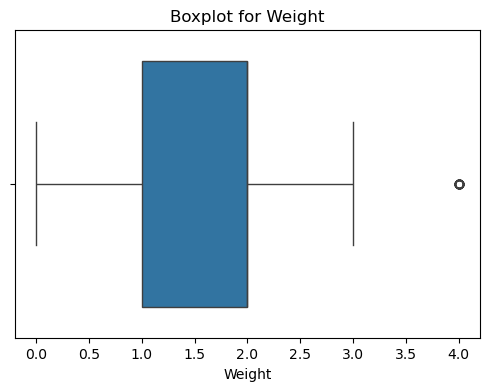

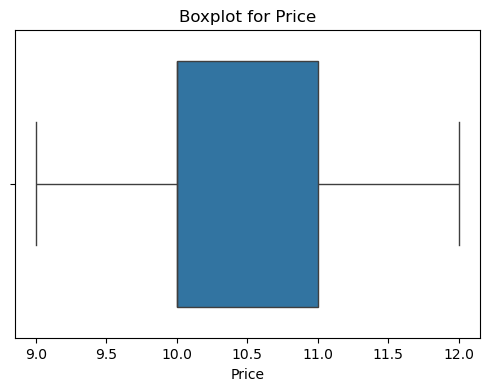

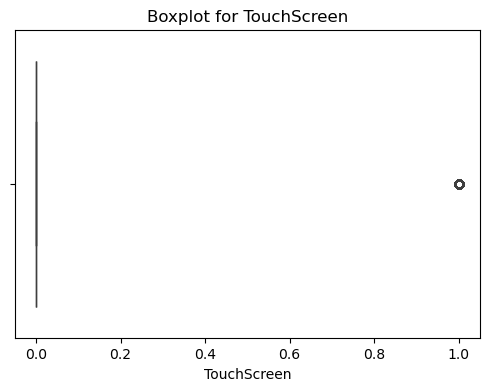

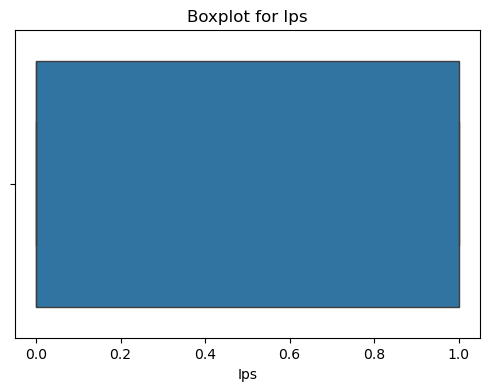

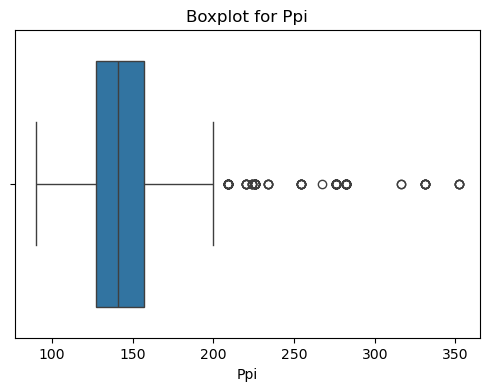

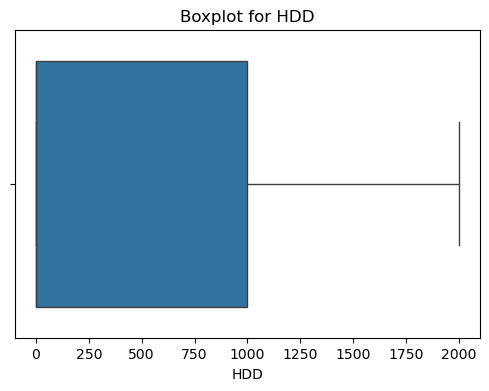

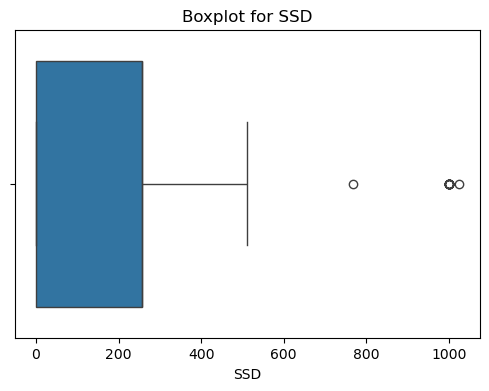

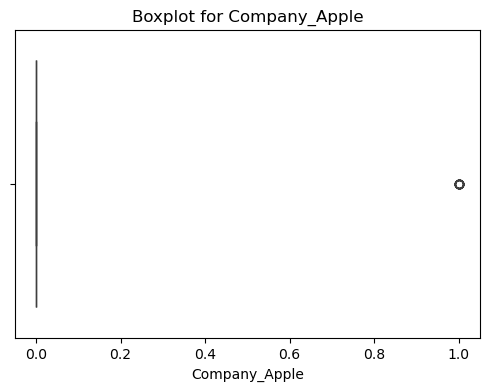

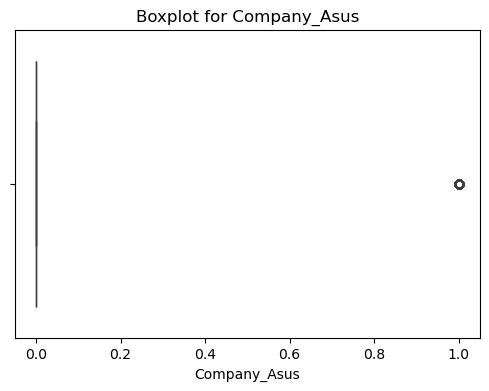

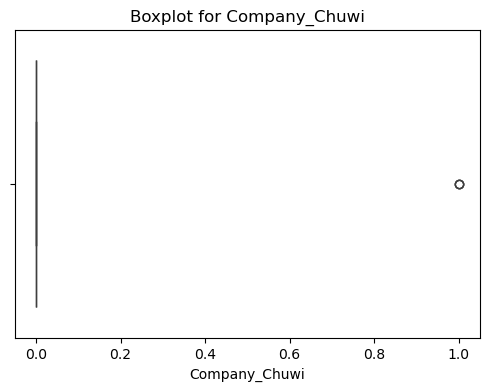

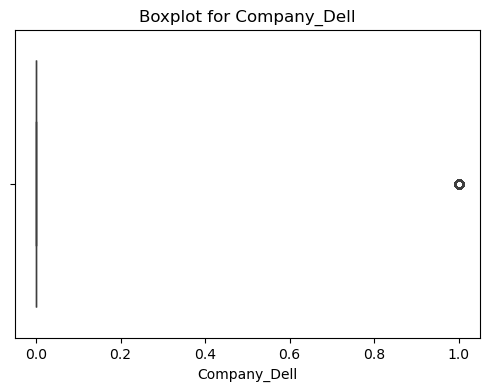

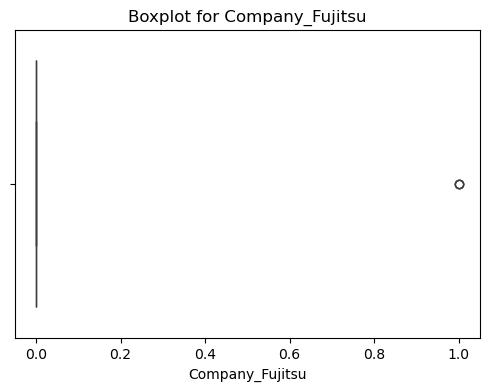

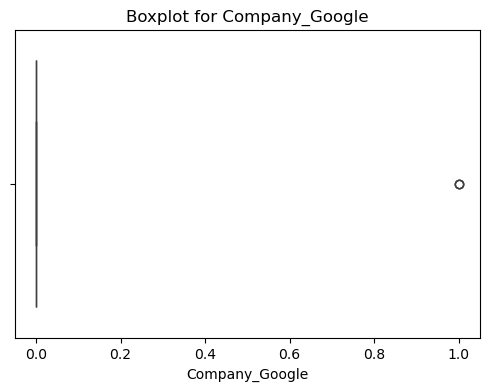

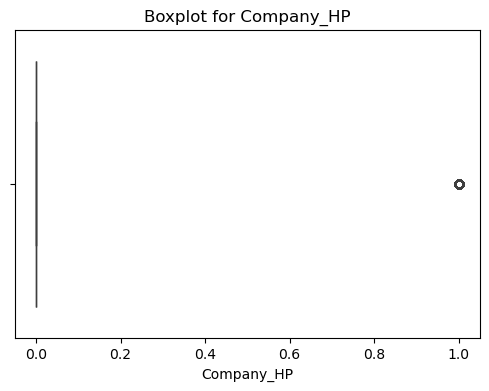

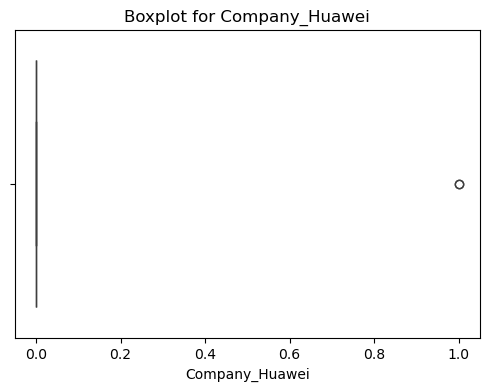

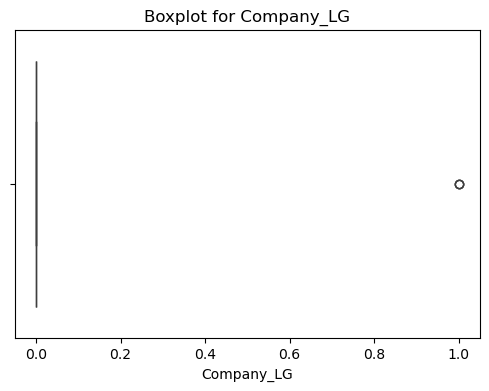

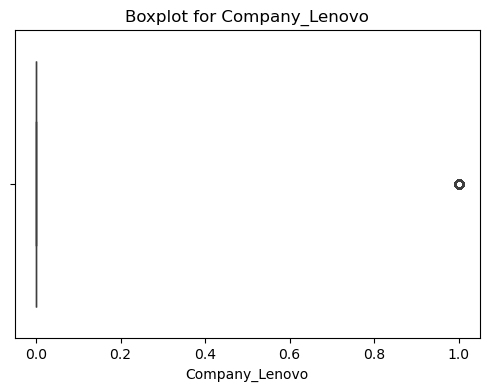

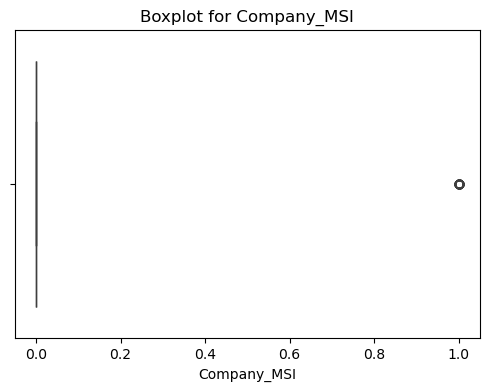

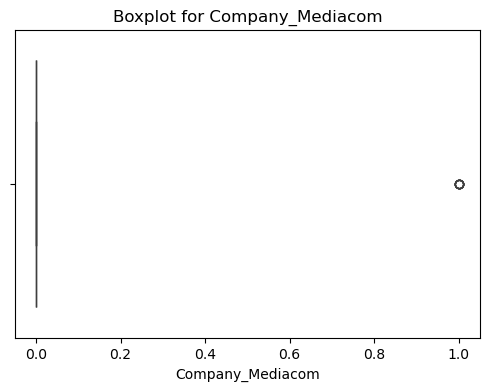

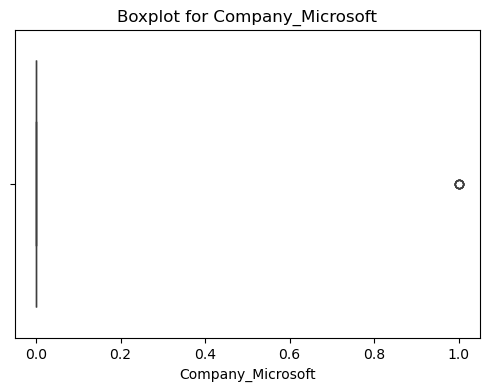

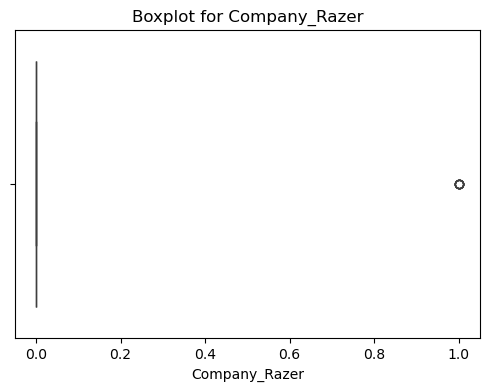

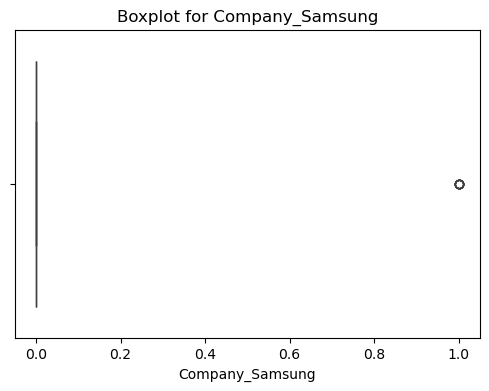

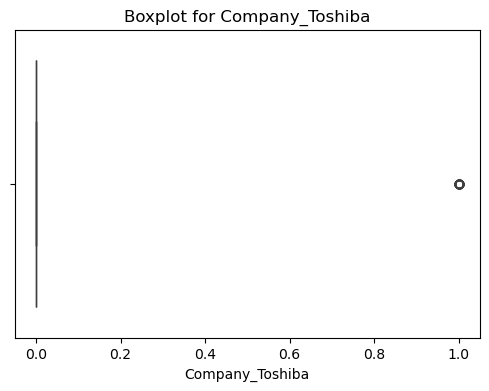

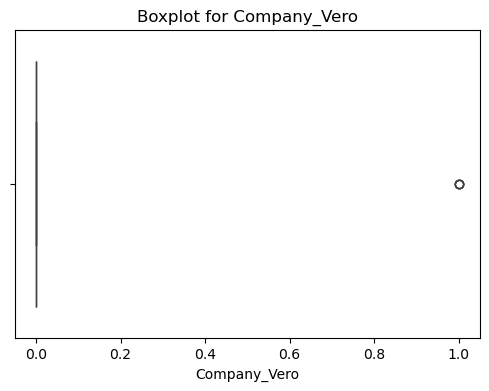

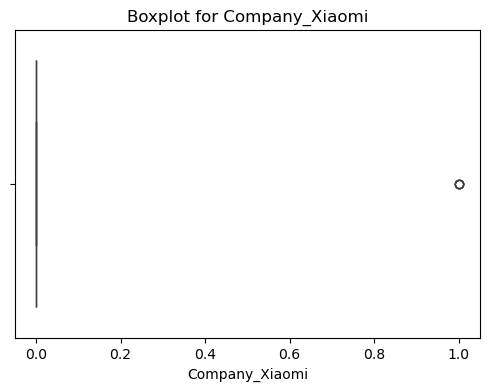

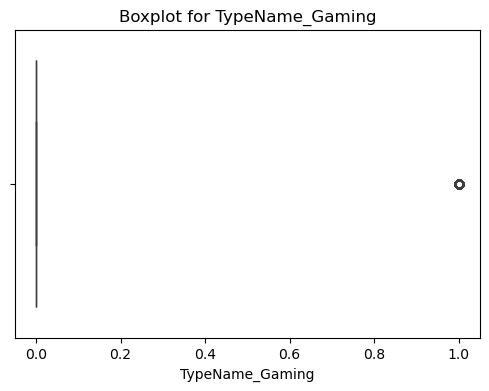

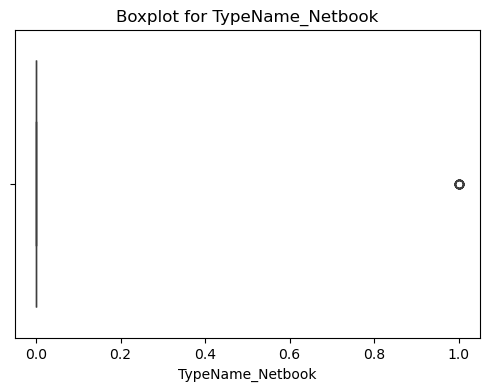

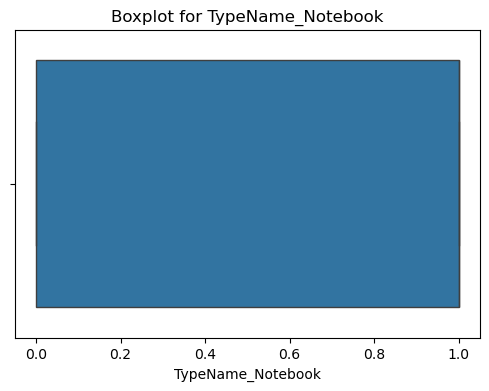

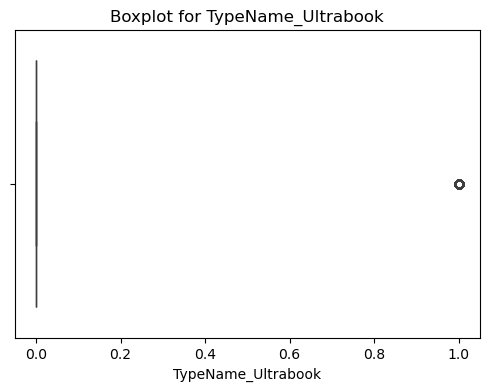

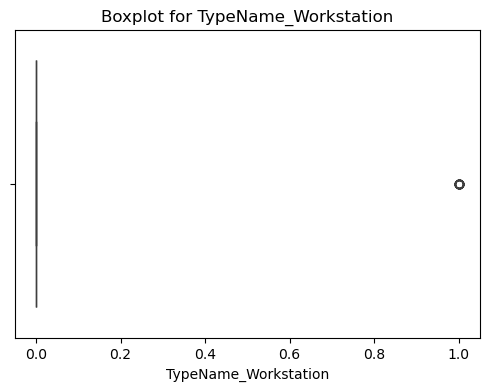

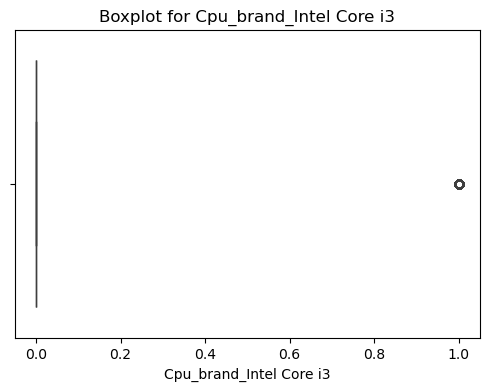

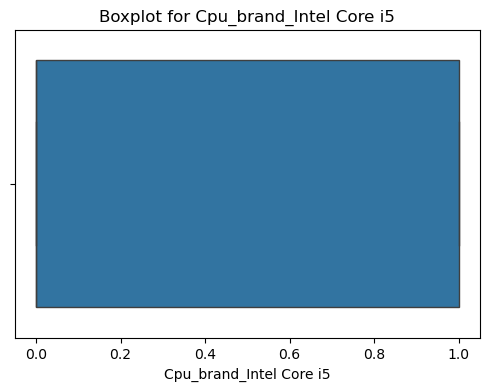

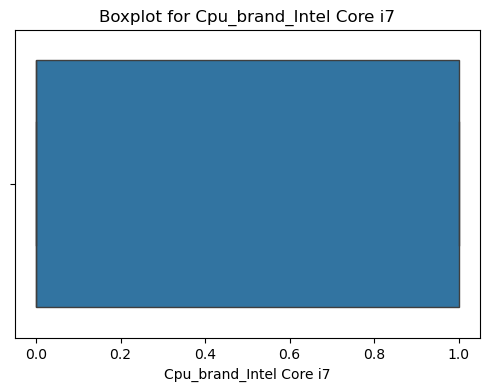

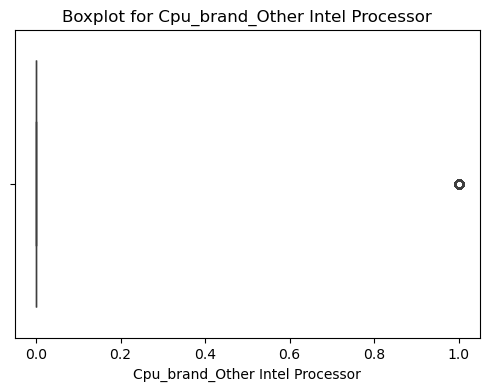

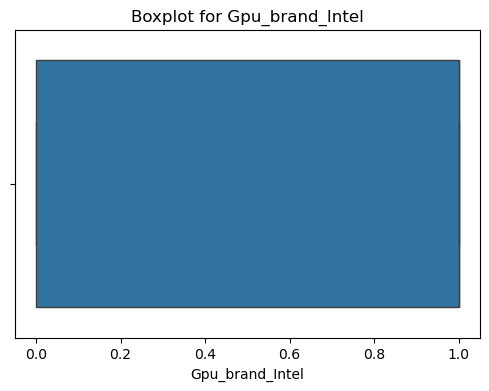

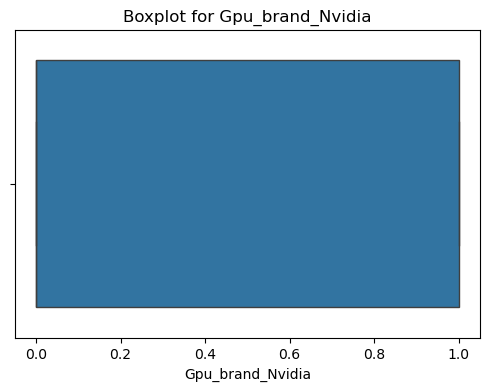

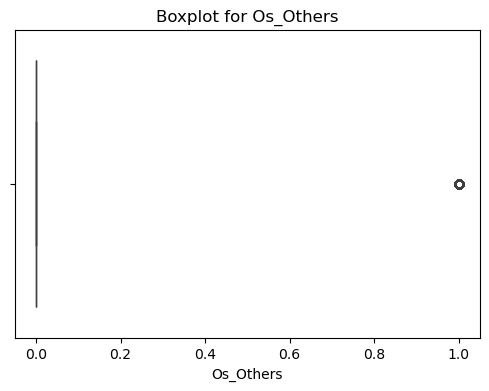

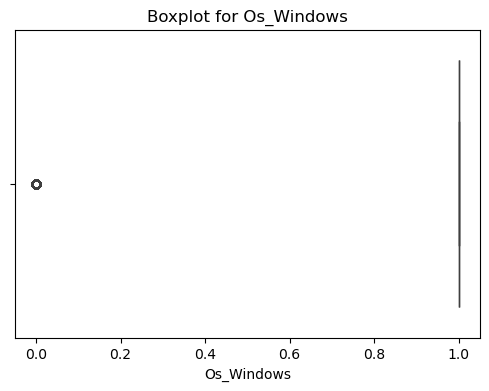

In [25]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [26]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   Ram  Weight  Price  TouchScreen  Ips  Ppi  HDD  SSD  Company_Apple  \
0    8     1.0     11            0    1  202    0  128              0   
1    8     1.0     10            0    0  127    0    0              0   
2    8     1.0     10            0    0  141    0  256              0   
3   14     1.0     11            0    1  202    0  512              0   
4    8     1.0     11            0    1  202    0  256              0   

   Company_Asus  ...  TypeName_Ultrabook  TypeName_Workstation  \
0             0  ...                   0                     0   
1             0  ...                   0                     0   
2             0  ...                   0                     0   
3             0  ...                   0                     0   
4             0  ...                   0                     0   

   Cpu_brand_Intel Core i3  Cpu_brand_Intel Core i5  Cpu_brand_Intel Core i7  \
0                        0                        1                        0   
1   

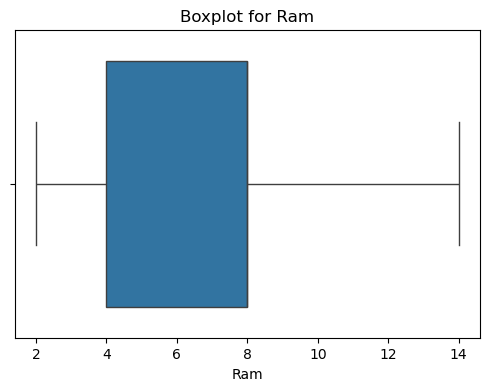

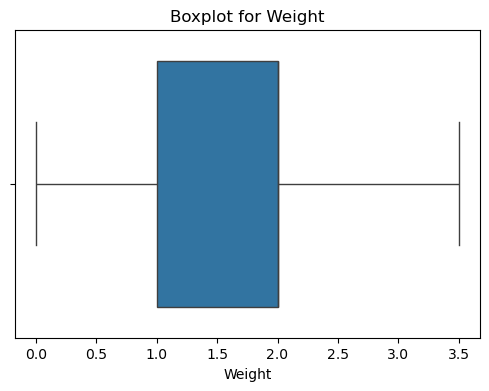

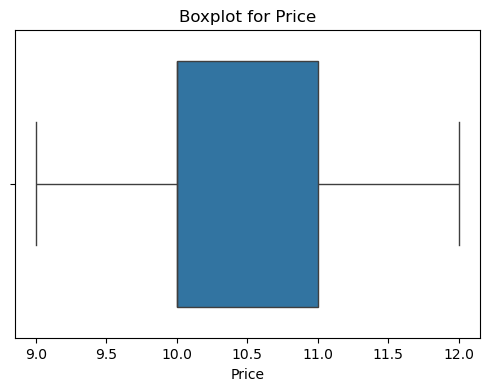

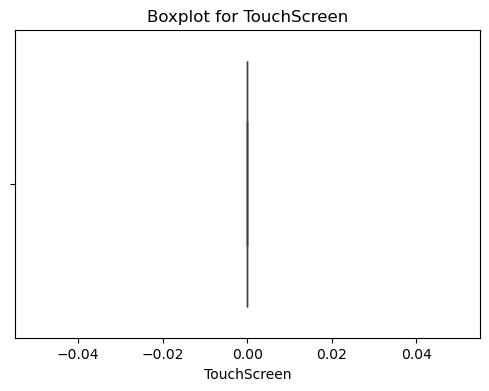

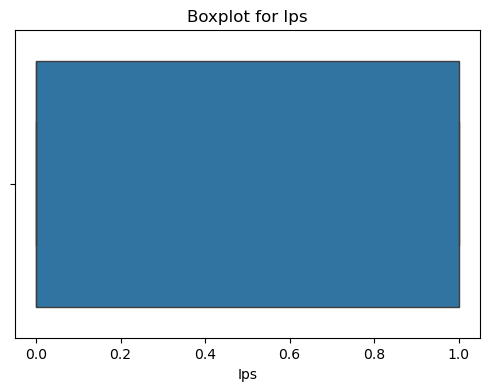

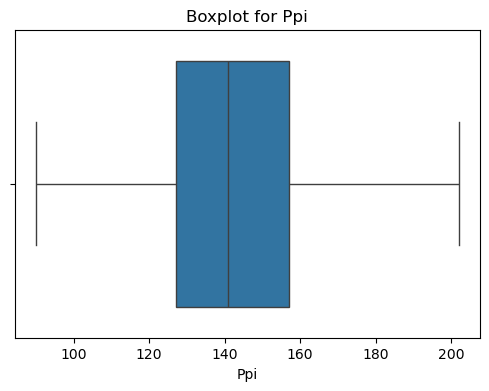

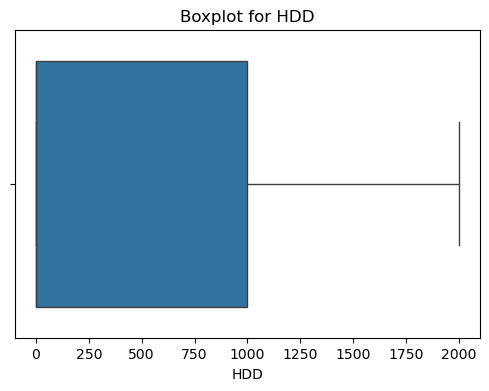

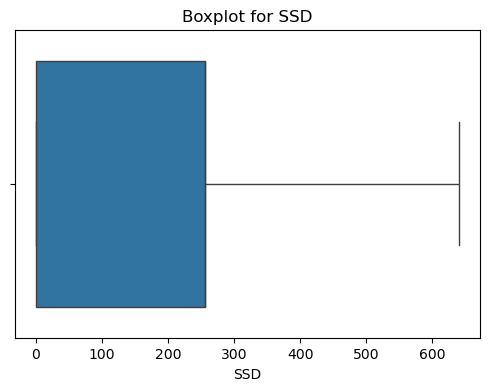

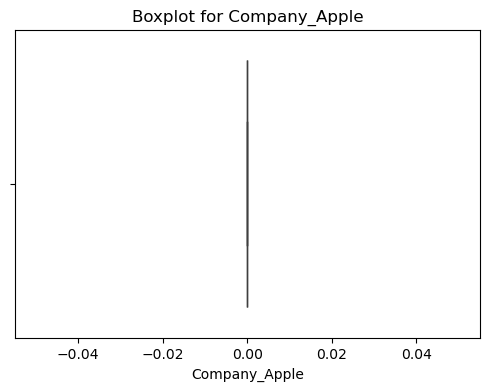

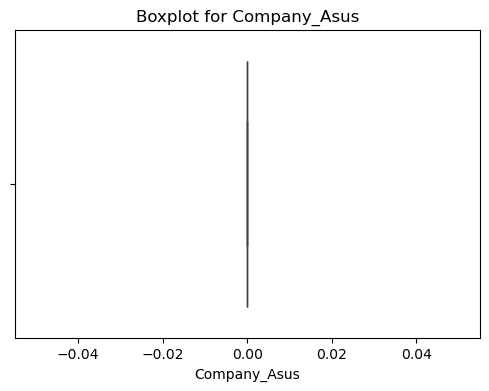

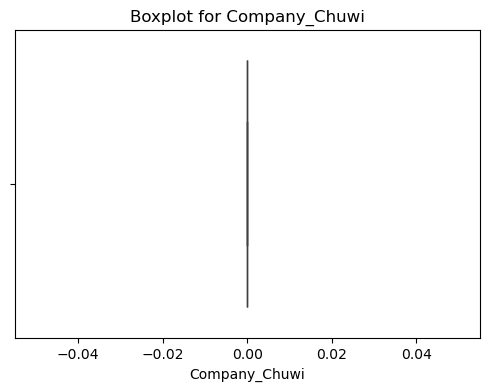

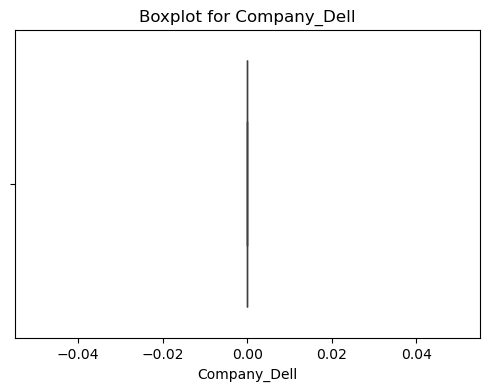

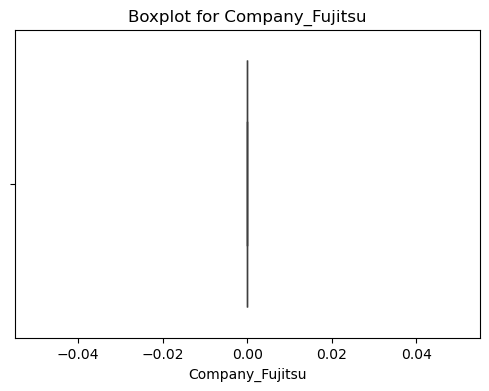

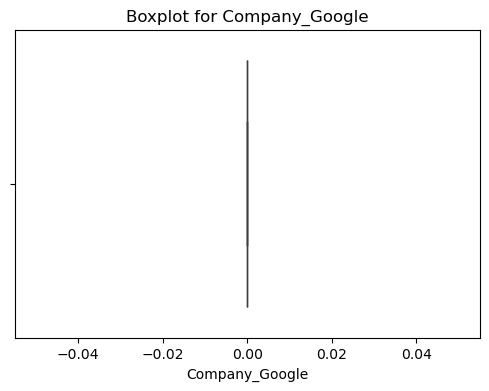

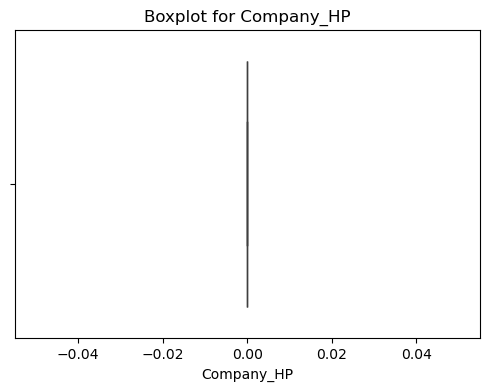

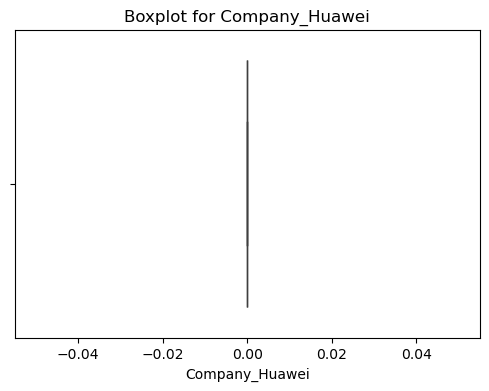

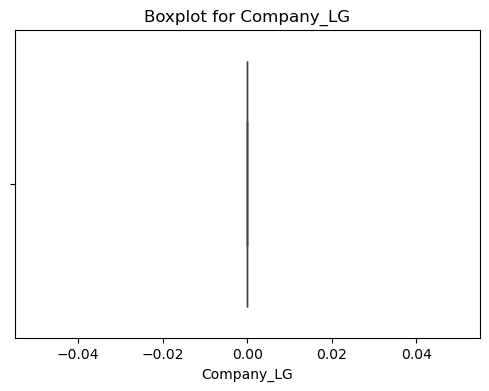

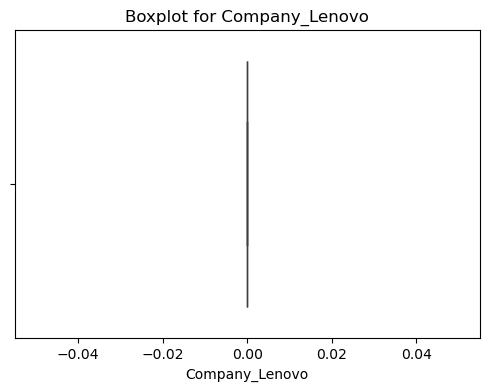

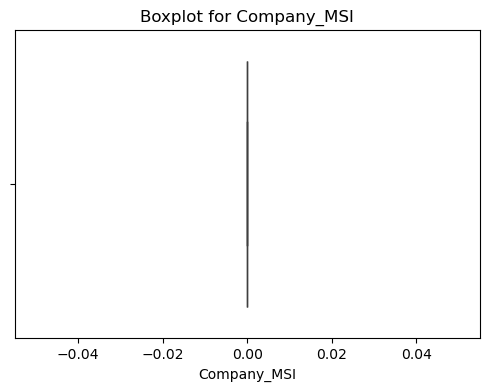

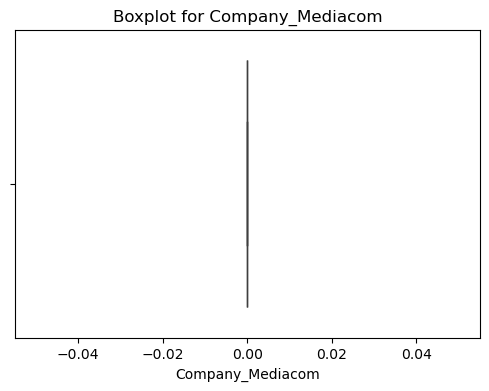

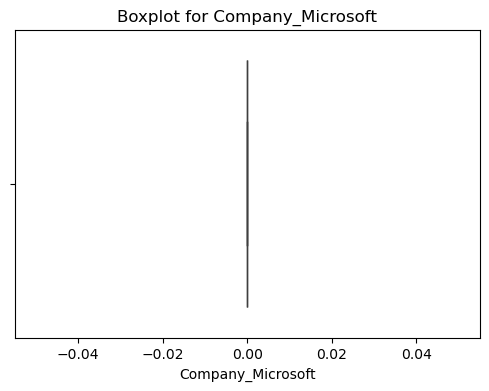

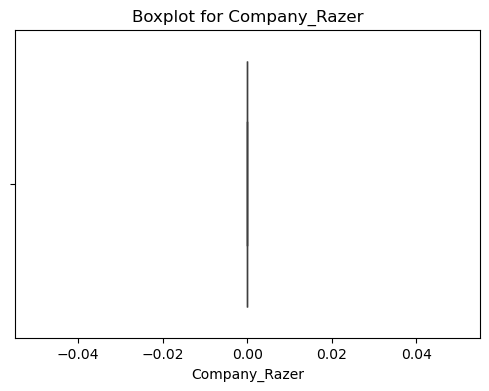

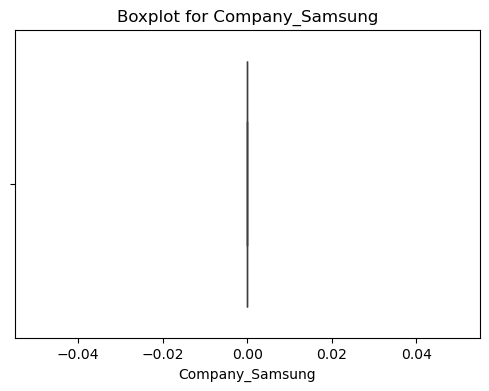

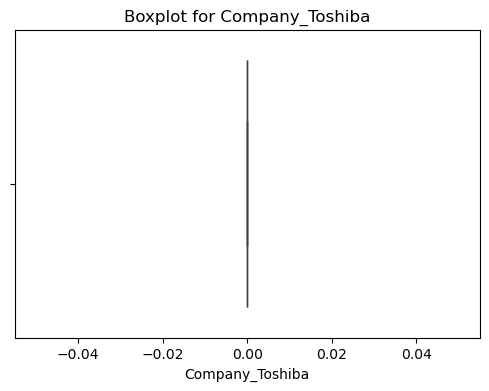

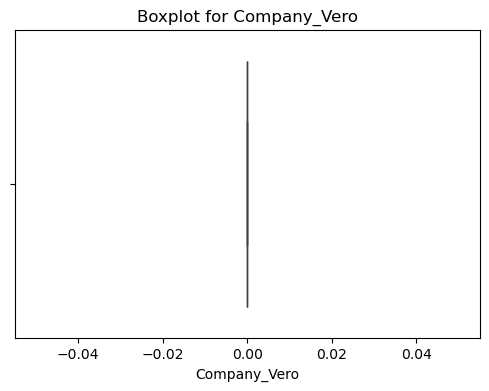

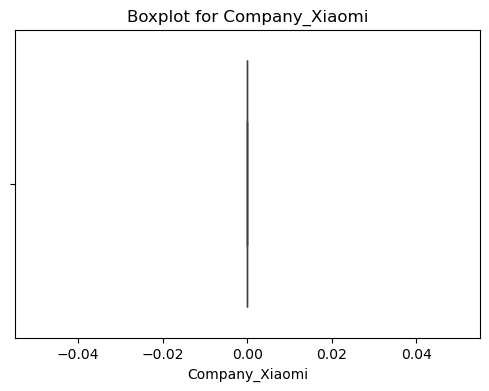

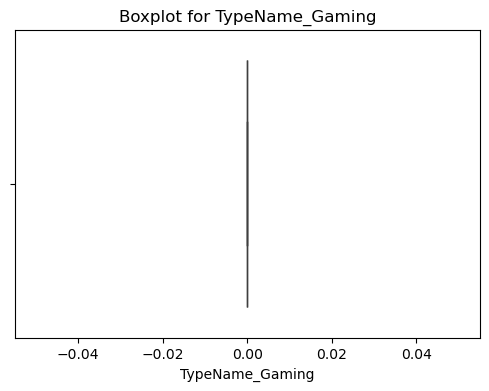

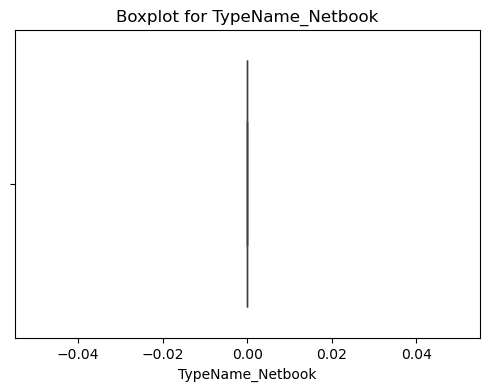

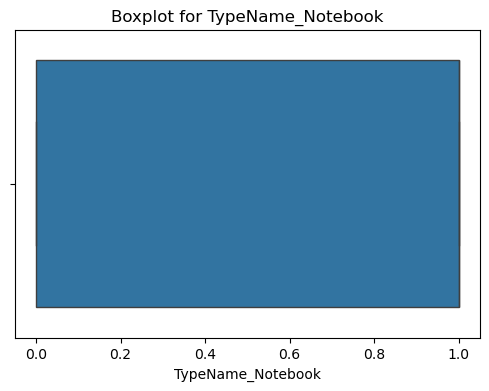

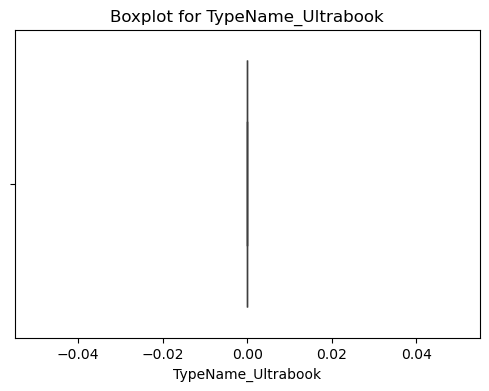

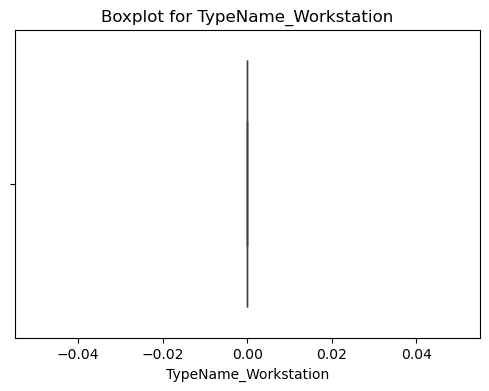

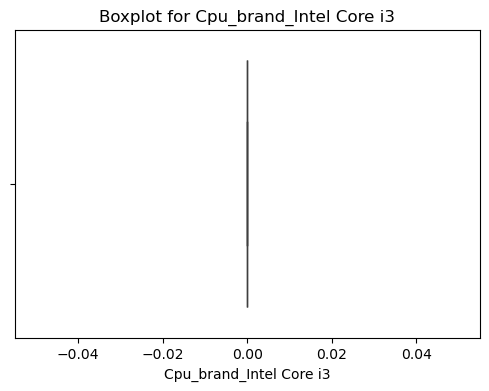

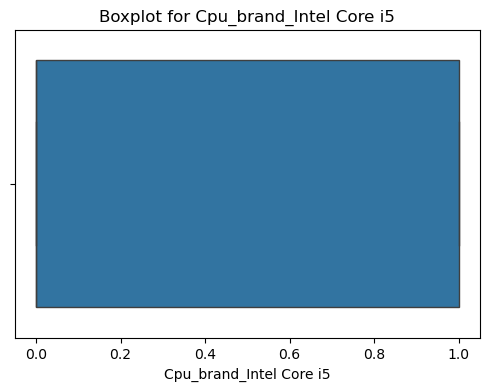

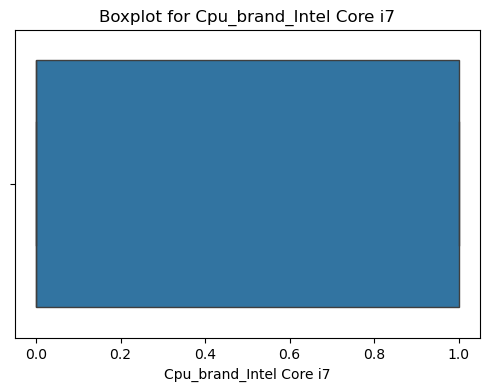

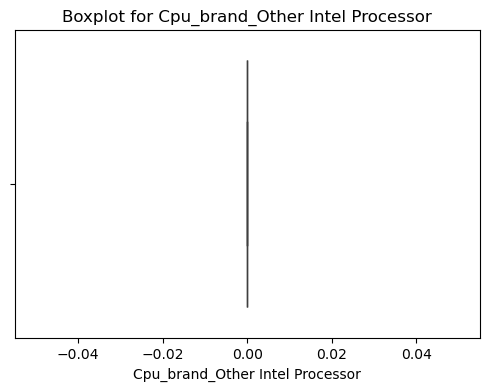

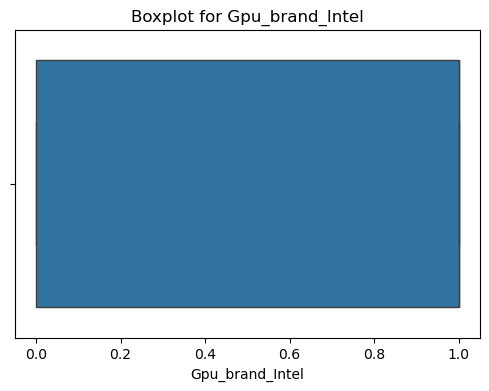

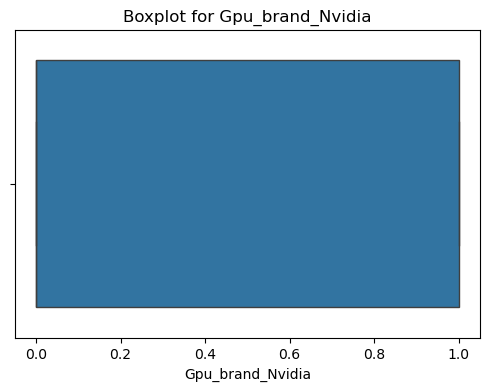

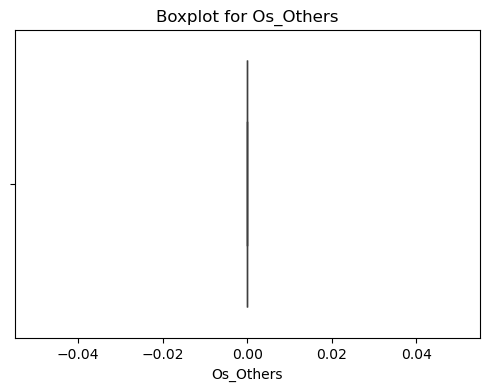

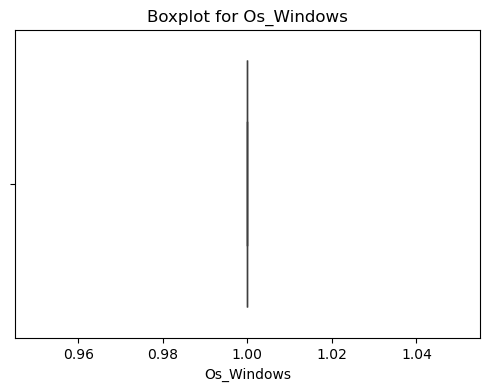

In [29]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting data

In [32]:
X = data.drop(columns=['Price'])
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [43]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear')
}

for name, reg in regressors.items():
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print(f'{name} Mean Squared Error: {mse:.2f}')
    print(f'{name} R^2 Score: {r2:.2f}\n')
    
    # Accuracy on train data
    train_score = reg.score(X_train_scaled, y_train)
    
    # Accuracy on test data
    test_score = reg.score(X_test_scaled, y_test)
    
    print(f'{name} - Train Accuracy: {train_score:.2f}, Test Accuracy: {test_score:.2f}')

Linear Regression R^2 Score: 0.61

Linear Regression - Train Accuracy: 0.62, Test Accuracy: 0.61
Random Forest Regressor R^2 Score: 0.63

Random Forest Regressor - Train Accuracy: 0.85, Test Accuracy: 0.63
Decision Tree Regressor R^2 Score: 0.62

Decision Tree Regressor - Train Accuracy: 0.69, Test Accuracy: 0.62
KNN Regressor R^2 Score: 0.63

KNN Regressor - Train Accuracy: 0.73, Test Accuracy: 0.63
SVR R^2 Score: 0.58

SVR - Train Accuracy: 0.59, Test Accuracy: 0.58


In [37]:
#END